- title: course: (ML Series) K Nearest Neighbors
- date: 2020-09-15 12:00
- category: course
- tags: python, machine learning
- slug: k nearest neighbors
- authors: Julien Hernandez Lallement
- summary: A discussion of K Nearest Neighbords algorithm
- illustration: 2020_09_k neirghbors.jpg

## K Nearest Neighbours Algorithm

This post is part of a series of post where I discuss different typical ML algorithms. Here, we will be discussing the relatively simple K Nearest Neighbours (KNN) algorithm, focusing on classification use.

### Introduction

KNN is a supervised learning technique, which means that it uses labelled data. The data is represented by vector of features, such as shape, length, and color. The dimension of the space in which these data points evolve is the number of features you are dealing with. In other words, each data point is represented by a vector of $X$ features.

Now say you get a new data point, and you want to know which shape, length or color it has based on its location in that space.

What KNN does is very simple from a mathematical perspective: it measures the distances between the new data point and the nearest K data points in the labelled dataset. Based on that, it will conclude to which class our new data point belongs by **majority**. See [here](https://www.sciencedirect.com/science/article/abs/pii/S0031320301001327) for reference.

### Use case

As mentioned before, KNN could be used for both regression and classification problems. 

With KNN, you could do the following:
* Classify observations
* Perform a regression of a numerical estimation
* Forecast events based on data features (price, shape, length, volume, etc...)

### Theoretical Background

As introduced before, a new data point is classified based on a majority [vote](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) of its neighbors, with the data point being categorized as the class most common amongst its $K$ nearest neighbors measured by a distance function. If $K$ = 1, the data point is simply assigned to the class of its nearest neighbor. 

Different distance functions can be used, and they may provide slightly different results:

\begin{equation*}
\left (Euclidian \right) = \left (\sqrt{\sum \limits _{i=1} ^{k }{x_i - y_i}^2}\right)
\end{equation*}

\begin{equation*}
\left (Manhattan \right) = \left (\sum \limits _{i=1} ^{k }{|x_i - y_i|}\right)
\end{equation*}

\begin{equation*}
\left (Minkowski \right) = \left (\sum \limits _{i=1} ^{k }{(|x_i - y_i|)^q}\right)^{1/q}
\end{equation*}

It should be noted that the above distance functions are only valid for continuous variables. If you are working with  categorical variables, then you should use the Hamming distance instead, but I will not be covering it in this post. 

Moreover, there are other distances, such as the Chebyshev distance (absolute value of the differences between all the entries in two vectors AND the maximum of these values), which could be useful for multi-dimenstional space. I have not yet tried such computations in a KNN, but maybe you find the time to try it out ;)

Finally, note that all three distance functions can be easily implemented using the KNN from SciKit Learn (see below).

### Search Algorithm

For very large datasets, it can become extremely computionally demanding to run a KNN. Other search algorithms sacrifice an exhaustive search for a faster run time. Structures such as KDTrees (see https://en.wikipedia.org/wiki/K-d_tree) or Ball trees (see https://en.wikipedia.org/wiki/Ball_tree) are used for faster run times. Have a look at them to see how they can optimize your process.

### Radius Neighbors Classifier

This is the same idea as a $K$ nearest neighbors classifier, but instead of finding the $K$ nearest neighbors, it will look at all the neighbors within a given radius. Decision on radius value should be taken after closely looking at the data distribution.

### K Neighbors Regressor
To use the same logic on a regression problem (as opposed to classification as it is now), we simply find the weighted average of the $K$ nearest neighbors. Instead of taking the majority class, we calculate a weighted average of these nearest values, using the same weighting method as above.

### Practical Demonstration

Let's have a look at a few use cases.

I will first be using the typical height & weight dataset, given for each gender. You can find the dataset on [Kaggle](https://www.kaggle.com/mustafaali96/weight-height), or in my [repository](https://github.com/juls-dotcom/juls-dotcom.github.io/tree/dev) in the dataset folder, "datasets_26073_33239_weight-height.csv".

In a follow up example, I will be using a Heroes dataset to show a more refined approach to run the KNN and compare its accuracy with another classification model.

In [5]:
import pandas as pd
import plotnine as p9

#### Weight & Height Data

In [9]:
df = pd.read_csv('datasets_26073_33239_weight-height.csv'
            )

In [10]:
df.sample(3)

,Gender,Height,Weight
9562,Female,62.299474,136.446336
4739,Male,70.030010,208.272739
4777,Male,64.416035,158.088178


In [11]:
df.groupby('Gender').count()

,Height,Weight
Gender,,
Female,5000,5000
Male,5000,5000


We have the same number of observations for each category. That is good, but not happening in real world situations. If you data is skewed (and it most probably will be), that is, if you have imbalanced data, you might have an issue. <br>

Since the classification as one category is based on the majority among the K neighboring data points, if say "Male" are overrepresented, then KNN would classify the new data point as "Male" with higher likelihood. However, if the classes would be balanced, you might actually see that you data point would be classified as "Female". <br>

One of the most common approach would be to weigh the number of K nearest data points by the inverse of their distance. As noted in the SciKit Learn documentation, "in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away". <br>
This is thus an option you can choose when implementing KNN using Sklearn. 

Let's first look at the distributions

In [12]:
from hide import toggle_code as show_solution
show_solution()
def plot_data(data, data_to_pred, pred):
    if pred:
        # Plot the data
        fig = (p9.ggplot()
        + p9.geom_point(data=data,
                        mapping=p9.aes(x='Height', y='Weight', color='Gender'),
                        alpha=0.1)
        + p9.geom_point(data = data_to_pred, 
                        mapping=p9.aes(x='Height', y='Weight'),
                        shape='o', 
                        color='k'
                       )
    )
    else:
        # Plot the data
        fig = (p9.ggplot()
        + p9.geom_point(data=data,
                        mapping=p9.aes(x='Height', y='Weight', color='Gender'),
                        alpha=0.1)
         )
    return fig

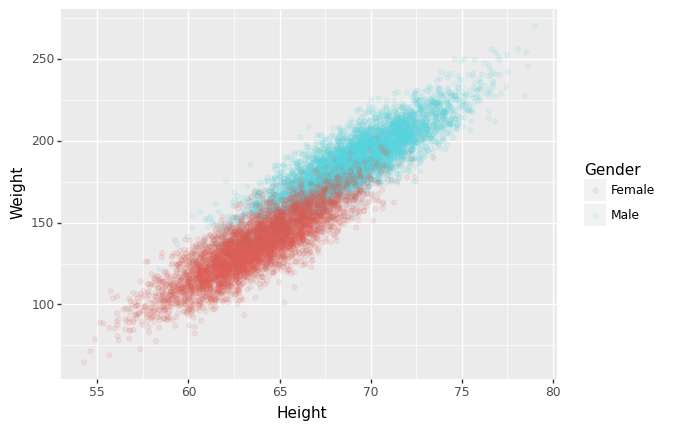

<ggplot: (8764325602489)>

In [13]:
plot_data(data=df, 
          data_to_pred = pd.DataFrame([[65,150], [75,225]], columns=['Height', 'Weight']), 
          pred=False)

Good. We have relatively clear clusters. That is seldom the case in real world situations :D <br>
Say you now get a new meaure from height and weight, but the label is missing. How can you determine which class it belongs to (example with the black dots below).

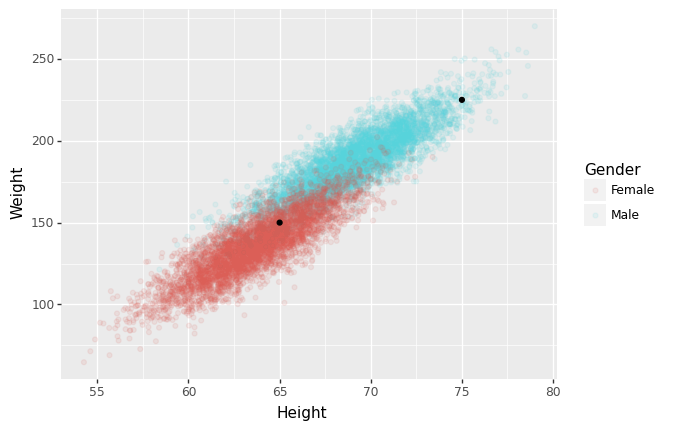

<ggplot: (8764320719729)>

In [14]:
plot_data(data=df, 
          data_to_pred = pd.DataFrame([[65,150], [75,225]], columns=['Height', 'Weight']), 
          pred=True)  

#### Preparing a KNN

I will scale the data since the two variables are relatively different in scale. Because of the obvious positive correlation between the two variables, I could also have done a PCA which would have spread the data. But since I am focusing on the KNN, I will simply scale using z-scores.

In [15]:
from sklearn.preprocessing import StandardScaler
# Load scaler
scaler = StandardScaler()
# Fit Scaler
scaler.fit(df[['Height', 'Weight']])
# Apply to values
scaled_values = scaler.transform(df[['Height', 'Weight']])

In [16]:
# Prepare scaled data
df_scaled = pd.concat([df.Gender, pd.DataFrame(scaled_values)], axis=1).rename(columns={0:'Height', 1:'Weight'})

# Prepare data to predict
test_dat = pd.DataFrame([[-1,-1], [2,2]], columns=['Height', 'Weight'])

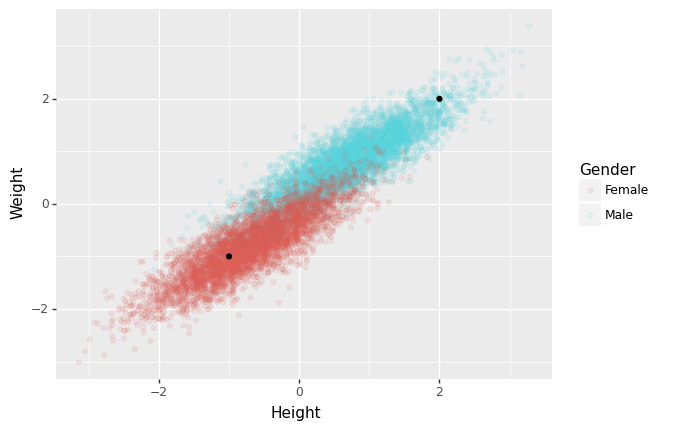

<ggplot: (8764320747469)>

In [17]:
plot_data(data=df_scaled, 
          data_to_pred = test_dat, 
          pred=True)

Good, our data is now scaled around 0 for each feature.

As you can see from above, we have two black data points to classify. From their location, the first one is most likely a female, and the second one almost for sure a male. 

Let's verify that

#### Running KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import numpy as np

There are many parameters you can adapt in KNN. Check [this](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more detailed description.

I am only defining the value K (number of neighbors to take into account), the weight (uniform cause we do not have an unbalanced dataset) and the distance function (here the Euclidian equation).

In [19]:
# Load the classifier
mod = KNeighborsClassifier(n_neighbors=5,     # K value
                           weights='uniform', # Weights to be used, in case of imbalanced datasets 
                           p = 2              # Distance function, here Euclidian distance
                          )

I then fit the model

In [20]:
# Fit
mod.fit(df_scaled[['Height', 'Weight']], df_scaled.Gender)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

I can finally predict the category for each of these two data points

In [21]:
print(mod.predict(test_dat))

['Female' 'Male']


We can see that as expected from our eye-balled prediction, these two data points fall in different categories. That was relatively easy, but for more complex data sets, that contain more data features or unclearer clusters, it might be useful to use that a general rule to cluster unseen data.

#### One Step Further

We have seen how we can simply cluster data based on previously existing labelled data. 
Good.

However, can we get an estimation of where the separation would lie?

To do so, we can use a Neighborhood Component Analysis (NCA), which is a supervised machine learning algorithm based on linear transformation.

As noted in the [SciKit Learn documentation](https://scikit-learn.org/stable/modules/neighbors.html), "NCA is attractive for classification because it can naturally handle multi-class problems without any increase in the model size, and does not introduce additional parameters that require fine-tuning by the user."

Since the KNN can create irregular decision boundaries (if the data is highly irregular itself), NCA can be useful because it does not make any assumptions about the way each category is distributed.

What is nice about the NCA is that it can help to detect classes that are unlikely to encompass unlabelled data, although their relative euclidian distance might suggest they do.

FYI, mathematically, NCA is based on a (squared) Mahalanobis distance metric, which is the distance between two points in multivariate space. Think of measuring distance between more than 2 variables, which becomes not impossible with a simple ruler. 


\begin{equation}
\left (d(Mahalanobis \right) = \left (((x_i - x_j)T * C - 1 * (x_i - x_j))^{0.5} \right)
\end{equation}

Where $x_i$ and $x_j$ is a pair of data points, and $C$ is the sample covariance matrix.


Let's use an NCA combined with a KNN, and visualize the added value of running that combination:

In [24]:
# Get the two features
features = df_scaled[['Height', 'Weight']].values
# Isolate the target
target = df_scaled.Gender == 'Female'

In [25]:
from hide import toggle_code as show_solution
show_solution()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
from matplotlib.colors import ListedColormap
from numpy import sqrt
from sklearn.metrics import mean_squared_error

#### Determining the value of K

I am using an elbow method to determine the optimal number of K. It will correspond to the lowest error rate

Optimal number of K = 11


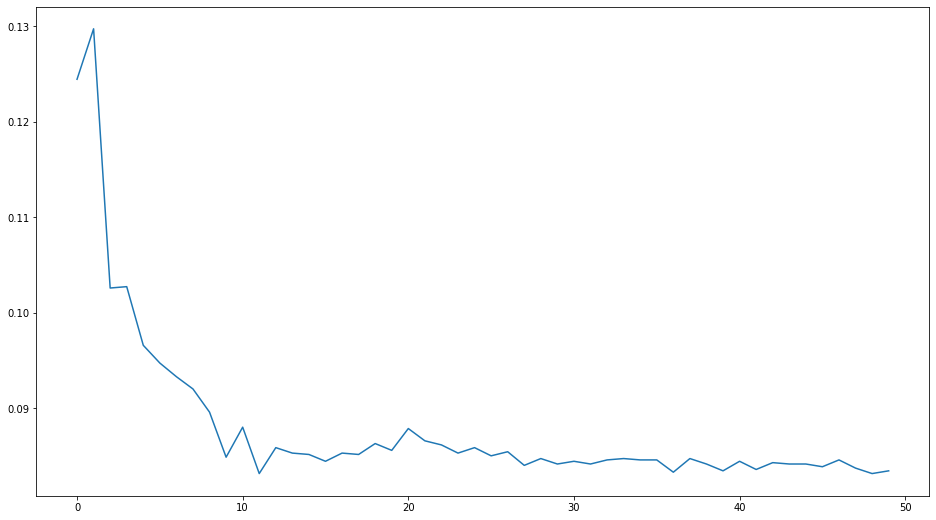

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.7, random_state=42)

error_rates = []
for K in range(50):
    K=K+1
    # Build model
    model = KNeighborsClassifier(n_neighbors = K)
    # Fit model
    model.fit(X_train, y_train)
    # Make predictions
    predictions = model.predict(X_test)
    # Store error rate
    error_rates.append(np.mean(predictions != y_test))

print("Optimal number of K = " + str(np.argmin(error_rates)))

plt.plot(error_rates)

Looks like K=11 is a good number of neighbors to classify new data points in this dataset. <br>

Let's move on an run different versions of the KNN using this K value

In [31]:
from hide import toggle_code as show_solution
show_solution()

n_neighbors = 11

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Name for final plots 
names = ['KNN', 'NCA, KNN Euclidian', 'NCA, KNN Manhattan']

# Prepare two pipelines, one using the NCA, and one without it.
classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,p = 2))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,p = 2))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,p = 1))
                         ])
               ]

# Fetch the min & max from the data features, and expand by one for plot limits
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
# Step size in the mesh
h = .01
# Prepare meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

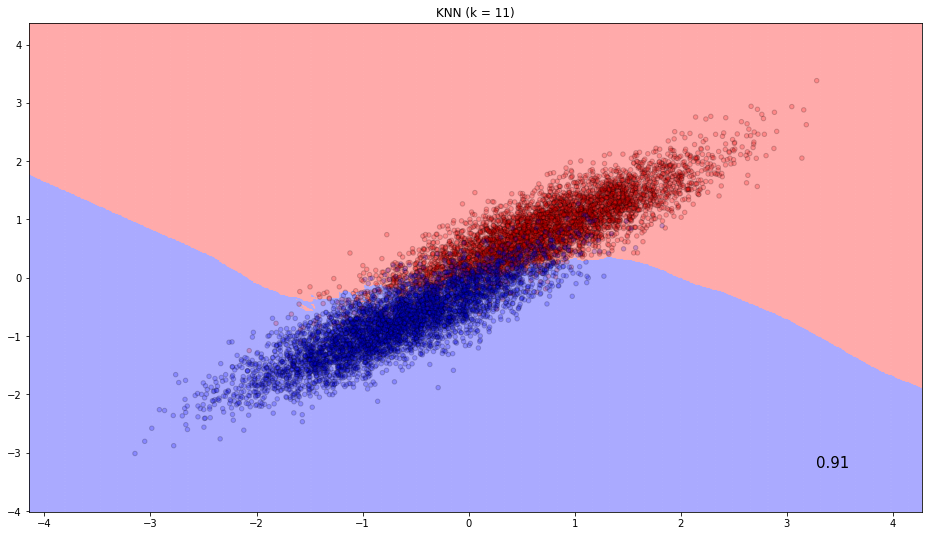

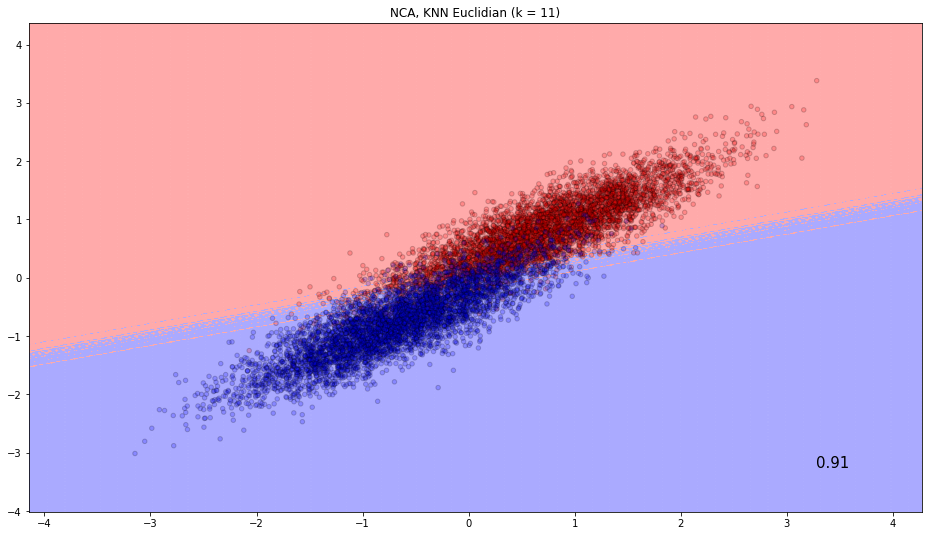

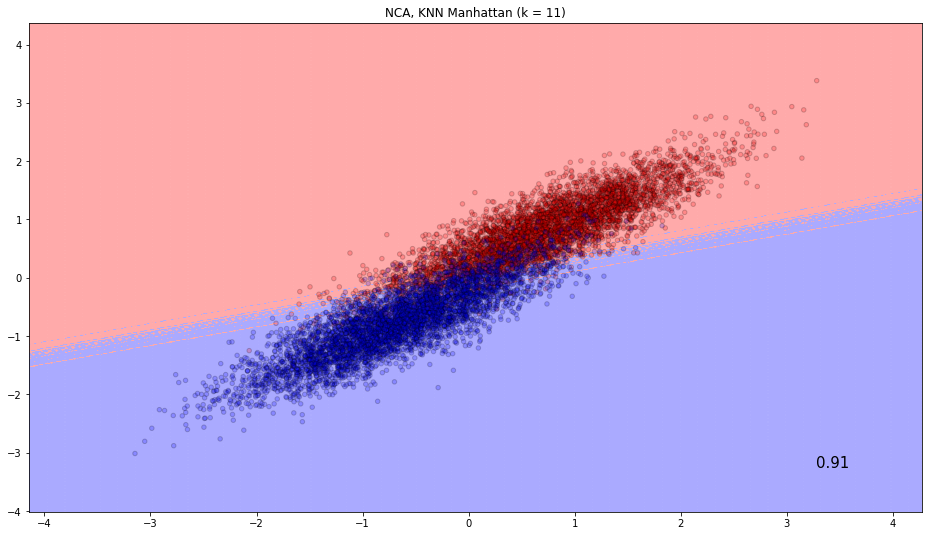

In [32]:
from hide import toggle_code as show_solution
show_solution()
for name, clf in zip(names, classifiers):

    # Fit on the train data
    clf.fit(X_train, y_train)
    # Get score using the test data for final display on plot
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(features[:, 0], features[:, 1], c=target, cmap=cmap_bold, edgecolor='k', s=20, alpha=0.2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

In [33]:
plt.show()

As one can see from the plots above, using the NCA creates decision boundaries that are not bound to the irregularities in the data. We additionally observe some kind of grey area where data the background color oscillates between the two categories

The accucary score as been very slightly improved. In this case, we might not want to overcomplexify things by adding a NCA, but in other situations, it might be a useful approach.

I was curious as to whether using a different distance function would yield very different results but that does not seem to be the case

#### Heroes data

Some time ago, I attented a class where we worked with an interesting dataset containing information about different character classes in a famous game ;)

Let's try to see whether we can classify data points using KNN. In order to compare its efficiency, I will enter a Logistic Regression in the pipeline. I won't be discussing what a Logistic Regression is here, that will be for a separate post. 

In [25]:
from sklego.datasets import load_heroes

In [76]:
df = load_heroes(as_frame=True)

In [77]:
df.head(2)

,name,attack_type,role,health,attack,attack_spd
0,Artanis,Melee,Bruiser,2470.0,111.0,1.00
1,Chen,Melee,Bruiser,2473.0,90.0,1.11


Let's combine some features, such as attack and attack speed which could be summarized under a "damage" feature.

In [85]:
def make_ml_data(dataf):
    return (dataf
            .dropna() # Drop missing values
            .assign(dmg=lambda d: d['attack'] * d['attack_spd']) # Create damage feature
            [['health', 'dmg', 'attack_type', 'role']] # Select features
            .assign(health = lambda d: d['health'].astype(float))) # Transform to float for model fit

In [86]:
ml_df = df.pipe(make_ml_data)
ml_df.head(2)

,health,dmg,attack_type,role
0,2470.0,111.0,Melee,Bruiser
1,2473.0,99.9,Melee,Bruiser


Let's visualize the data before we move to modelling

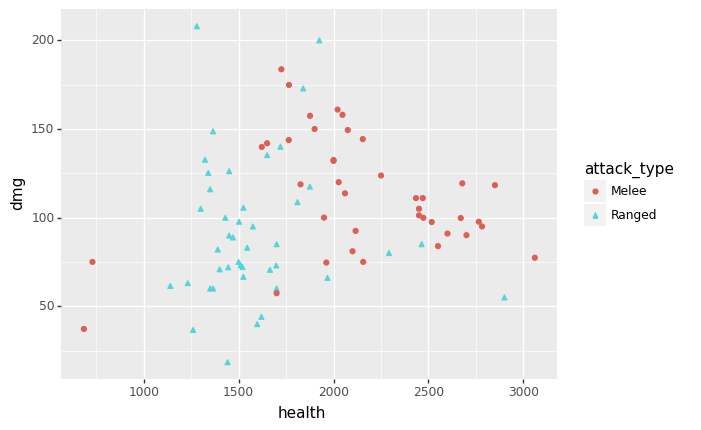

<ggplot: (8727927063681)>

In [87]:
(p9.ggplot() + 
 p9.geom_point(data=ml_df, mapping=p9.aes("health", "dmg", shape="attack_type", color="attack_type")))

Looks like there is a relatively clear pattern in the data, with Melee types having higher health and damage scores.

Now, let's try to fit a KNN and Logistic Regression (for comparison) to the data

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

from sklego.preprocessing import ColumnSelector

I will be using the Pipeline method from Sklearn to create a pipeline that will treat the features in the dataset at once.
<br>
The continous features (health and dmg) will be scaled for comparison. 
<br>
The categorical feature (role) will be one hot encoded.

Below, the data preparation pipeline

In [ ]:
panda_grabber = Pipeline([
    ("union", FeatureUnion([
        ("continous", Pipeline([
            ("select", ColumnSelector(["health", "dmg"])),
            ("scale", StandardScaler())
        ])),
        ("categorical", Pipeline([
            ("select", ColumnSelector(["role"])),
            ("encode", OneHotEncoder(sparse=False))
        ]))
    ]))
])

One thing that one can control for is non linear interacitons between features in the data, which can be unexpected and difficult to predict.

One useful approach to reveal such interactions is to create new features that enable you to use them and check whether they improve model performance. This is quite a useful approach since it allows you to use simple model while still capturing complex interaction patterns, since these interactions are placed direclty in the data as features. One potential down side is the addition of a large number of features to the model, so a trade off should be found there

Such features are typically referred to as `polynomial` features.

Below, I am adding this step in the ML pipeline, and selecting only cases for which the features have significant interactions. For the ones not versed in statistical terms, interactions happen when the effect of one variable is dependent on another variable in the dataset.

In [89]:
pipeline = Pipeline([
    ("grab", panda_grabber),
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("model", KNeighborsClassifier(10))
])

Good. Now, we can fit the model.

In order to tune the hyperparameters, I will be using GridSearch, which is a technique that tries to compute the optimum values of hyperparameters. Hyperparameters are parameters of the model that are not affected by the training. They are pre defined by the user, and should therefore be carefully chosen. 

In [ ]:
# Set a Polynomial Features and no parameters
param_poly = [PolynomialFeatures(interaction_only=True), 
              None]
# test different K for KNN and one Logistic Regression for comparison
param_model = [KNeighborsClassifier(1), 
               KNeighborsClassifier(10), 
               KNeighborsClassifier(20), 
               LogisticRegression(solver='lbfgs')]

Above, I have defined the different parameters to be tested by GridSearch

Now, let's run the GridSearch on these parameters...
Note that I use 4 cross validations splitting strategy, which will automatically run the train/test split for me a number of times.

In [92]:
mod = GridSearchCV(pipeline,
                   #iid=True,
                   return_train_score=True,
                   param_grid={"model": param_model, 
                               "poly": param_poly},
                   cv=4)

...and fit the model to predict attack type.

In [93]:
mod.fit(ml_df, ml_df['attack_type']);

In [94]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_poly,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.006993,0.001758,0.005005,0.001109,"KNeighborsClassifier(algorithm='auto', leaf_si...","PolynomialFeatures(degree=2, include_bias=True...",{'model': KNeighborsClassifier(algorithm='auto...,0.714286,0.761905,0.904762,0.90,0.820238,0.083867,6,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004281,0.000139,0.003420,0.000391,"KNeighborsClassifier(algorithm='auto', leaf_si...",None,{'model': KNeighborsClassifier(algorithm='auto...,0.714286,0.809524,0.904762,0.90,0.832143,0.077910,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.004173,0.000183,0.003196,0.000096,"KNeighborsClassifier(algorithm='auto', leaf_si...","PolynomialFeatures(degree=2, include_bias=True...",{'model': KNeighborsClassifier(algorithm='auto...,0.904762,0.809524,0.904762,0.85,0.867262,0.040138,1,0.903226,0.919355,0.919355,0.920635,0.915643,0.007188
3,0.003975,0.000075,0.003035,0.000027,"KNeighborsClassifier(algorithm='auto', leaf_si...",None,{'model': KNeighborsClassifier(algorithm='auto...,0.952381,0.809524,0.904762,0.80,0.866667,0.064242,2,0.903226,0.903226,0.887097,0.904762,0.899578,0.007233
4,0.004200,0.000094,0.003173,0.000019,"KNeighborsClassifier(algorithm='auto', leaf_si...","PolynomialFeatures(degree=2, include_bias=True...",{'model': KNeighborsClassifier(algorithm='auto...,0.904762,0.761905,0.857143,0.85,0.843452,0.051573,3,0.887097,0.870968,0.870968,0.873016,0.875512,0.006741
5,0.003891,0.000014,0.003007,0.000004,"KNeighborsClassifier(algorithm='auto', leaf_si...",None,{'model': KNeighborsClassifier(algorithm='auto...,0.904762,0.761905,0.904762,0.80,0.842857,0.063353,4,0.887097,0.903226,0.854839,0.904762,0.887481,0.020076
6,0.007042,0.000254,0.002235,0.000020,"LogisticRegression(C=1.0, class_weight=None, d...","PolynomialFeatures(degree=2, include_bias=True...","{'model': LogisticRegression(C=1.0, class_weig...",0.523810,0.904762,0.904762,0.80,0.783333,0.155821,7,1.000000,0.983871,0.951613,0.968254,0.975934,0.017977
7,0.006052,0.000034,0.002204,0.000113,"LogisticRegression(C=1.0, class_weight=None, d...",None,"{'model': LogisticRegression(C=1.0, class_weig...",0.476190,0.761905,0.904762,0.80,0.735714,0.158704,8,0.935484,0.919355,0.935484,0.936508,0.931708,0.007144


As you can see above, we get one line per model and hyper parameter tested by the GridSearch (that is 4 models, times 2 parameters [PolynomialFeatures & None], so 8 lines in total)

We can see from the "rank_test_score" column that a KNN with 10 neighbors and interaction effect taken into account is the best model. However, the following line which is the same model without interaction effects is extremely close, and more simple, so I would tend to select this model over the first one, despite lower accuracy (expainability/interpretability has very high value as well ;) )

In [98]:
ml_df

,health,dmg,attack_type,role
0,2470.0,111.00,Melee,Bruiser
1,2473.0,99.90,Melee,Bruiser
2,2434.0,111.00,Melee,Bruiser
3,2450.0,101.26,Melee,Bruiser
4,2550.0,83.93,Melee,Bruiser
...,...,...,...,...
79,2700.0,90.09,Melee,Tank
80,2600.0,91.00,Melee,Tank
81,2765.0,97.68,Melee,Tank
82,3060.0,77.35,Melee,Tank


Let's generate random data, drawn from a uniform distribution for both features "health" and "dmg", and one single role feature. The goal here is to simulate new data points, for which we will predict whether they would be Melee or Ranged attack types.

In [106]:
n = 10000
simulated_df = pd.DataFrame({
    "health": np.random.uniform(ml_df.health.min()-20, ml_df.health.max()+20, n),
    "dmg": np.random.uniform(ml_df.dmg.min()-5, ml_df.dmg.max()+5, n),
    "role": "Bruiser"
})

Let's now compute the probability of being Melee

In [109]:
pltr = simulated_df.assign(pred = lambda d: mod.predict_proba(d)[:, 0])

Note that I am selecting the first column on the `predict_proba` output, since the sum of both columns would equal to 1, as shown below:

In [116]:
mod.predict_proba(simulated_df)

array([[1. , 0. ],
       [0.3, 0.7],
       [0.2, 0.8],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2]])

In [118]:
pltr.sample(4)

,health,dmg,role,pred
8332,2129.782066,106.834593,Bruiser,0.9
1798,3019.212044,51.708832,Bruiser,0.9
1141,2222.726034,37.255074,Bruiser,0.8
668,1098.746852,211.710480,Bruiser,0.4


We have 10.000 simulated entries in `pltr`, for which we have predicted the probability of beeing classified as Melee. <br><br>
Let's visualize that:

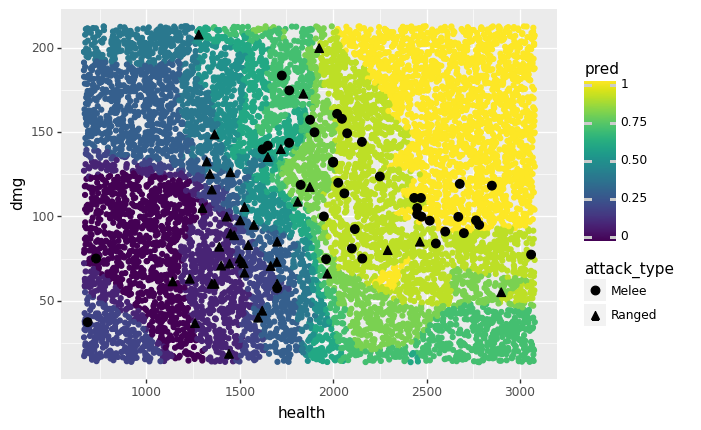

<ggplot: (8727925338565)>

In [112]:
(p9.ggplot() + 
  p9.geom_point(data=pltr, mapping=p9.aes('health', 'dmg', color='pred')) + 
  p9.geom_point(data=ml_df, mapping=p9.aes('health', 'dmg', shape='attack_type'), size=3))

The black dots are the real data points, and the coloured dots are the simulated data, color coded by probability of being Melee. 


We can see an interesting and consistent overlap with the real data, which confidence decreasing as we approach the zone where both attack types start to overlap, and reversing for Ranged attack type data points.

### Final words

That's it for now regarding K Nearest Neighbors! 

Keep posted for further posts on other ML algorithms!